# Coursera Capstone project: identification of the best places for a café-bookshop in Geneva (Switzerland)

# Table of contents
<br>

* [Introduction: business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Conclusion](#conclusion)
* [References](#references)

## 0. Introduction: business problem <a name="introduction"></a>

With this project, we intend to support any investors looking for the best place in Geneva (Switzerland) to open a new concept of **Café-Bookshop**: a place which doesn't exist in this city yet and where the visitor can savor a hot chocolate as well as discover the newest published titles of fictions, thrillers or documentaries.

To this means, we need to find a neighbourood which meets the following criterias: i) in the city center, ii) with no bookshop nor iii) any cafés in the close vicinity and finally, iv) with a bus stop nearby.


## 1. Data Sources<a name="data"></a>

In order to decide which location is the best, the following figures need to be produced:
* distance of the neighborhood from the city center
* number of existing cafés in the neighborhood
* number of existing bookshops in the neighborhood
* number of existing bus stops in the neighborhhod.


We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.


Following data sources will be needed to extract/generate the required information:<br>
1. number of cafés, bookshops and their location in every neighborhood:<br>
* will be obtained using **Foursquare API** (https://developer.foursquare.com/docs/places-api/)<br>
* the data are updated yearly and available through direct query<br>

2. number of bus stops and their location: <br>
* will by extracted from the **Geneva public transportation (TPG)** data (https://opendata.swiss/fr/dataset/__274)<br>
*the data are updated yearly and available as a CSV file<br>

3. coordinate of Geneva city center:<br>
* will be obtained using **Google Maps API geocoding** (https://developers.google.com/maps/documentation/geocoding/overview)<br>

4.  centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas:<br>
* will be obtained using **Google Maps API reverse geocoding** (https://developers.google.com/maps/documentation/geocoding/overview#ReverseGeocoding)<br>





## 2. Methodology

<br>
We used the following methodology wich we detail below:

1. Data acquisition
2. Coordinates transformation
3. Grid creation with Google Map data
4. Integration of Foursquare and TPG data
5. Calculation of best neighboroods
6. Calculation of clusters of neighboroods

### 2. 1 Data acquisition

#### 2.1. 1 Google maps query


Google Maps has been used for :

* i) getting the city center coordinates
* ii) getting the calculated neighborhood coordinates
* iii) getting the address corresponding to the neighborhood coordinates.













#### 2.1. 2 Foursquare query

Foursquare has been used for acquiring the Café and Bookshops data in each neighborhood (venues). In order to select them, we have identified several categories  which can be queried for (https://developer.foursquare.com/docs/build-with-foursquare/categories/).

The café categories which we have used are the following:
* cafe: 4bf58dd8d48988d16d941735
* coffee_shop: 4bf58dd8d48988d1e0931735
* internet cafe: 4bf58dd8d48988d1f0941735
* gaming café : 4bf58dd8d48988d18d941735
* tea-room : 4bf58dd8d48988d1dc931735
* bar : 4bf58dd8d48988d116941735

Excerpt from the Foursquare Cafés raw data:

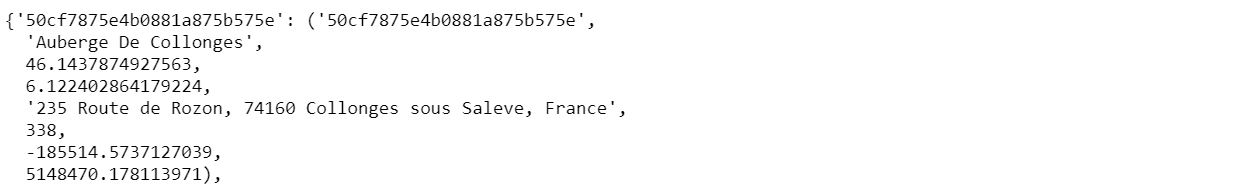

The bookshops categories which we have used are the following:
* bookstore: 4bf58dd8d48988d114951735 <br>
* used bookstore: 52f2ab2ebcbc57f1066b8b30 <br>
* college bookstore: 4bf58dd8d48988d1b1941735<br>

Excerpt from the Foursquare Bookshops raw data:

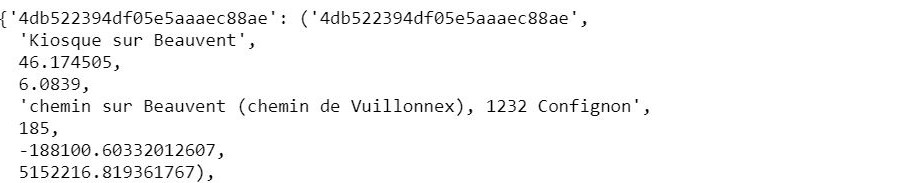

#### 2.1. 3 TPG query

Our first attempt has been to use the Foursquare data to identify the bus stops locations. Unfortunately, we have discovered that many bus stops were missing from Foursquare (about half of them). Consequently, we have looked for another data source and found the Geneva transportation ones (https://opendata.swiss/fr/dataset/__274).








Excerpt from the TPG raw data:


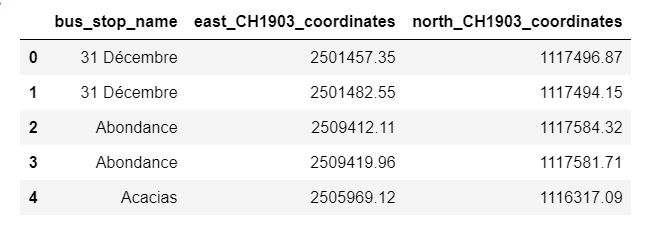

## 2. 2 Coordinates transformation

<br>

#### 2.2.1 From longitude/latitude to x/y:

In order to convert the data from the WGS84 spherical coordinate system (latitude/longitude degrees) to the UTM Cartesian coordinate system (X/Y coordinates in meters), and vice-versa, we have used the following functions:

* lonlat_to_xy(lon, lat)
* xy_to_lonlat(x, y)
* calc_xy_distance(x1, y1, x2, y2)


#### 2.2.2 From the Swiss Geodesic system (CH1903) to the World Geodesic System (WGS84):

The TPG data are delivered according to the Swiss Geodesic System (CH1903), but the Google Maps ones are using the World Geodesic System (WGS84). Consequently, we have adapted two functions from () in order to be able to get the TPG data coordinates with the World Geodesic System:

* CHtoWGSlng(e, n)
* CHtoWGSlat(e, n)

### 2. 3 Grid creation with Google Map data

In order to explore the city of Geneva, we have created a grid with a radius of 6000m around a central location on the city map. We have chosen as city center a place we know for its central position in the city of Geneva: Plaine de Plainpalais, Genève, Switzerland: [46.1983927, 6.1405447]

The calculation of each cell (or neighborood) has been adapted from the example given for the project. The spacing between cells is adjusted so as that each if its centroid is equally distant from it's neighbors.

It ended up with 364 candidate neighboroods as depicted below.



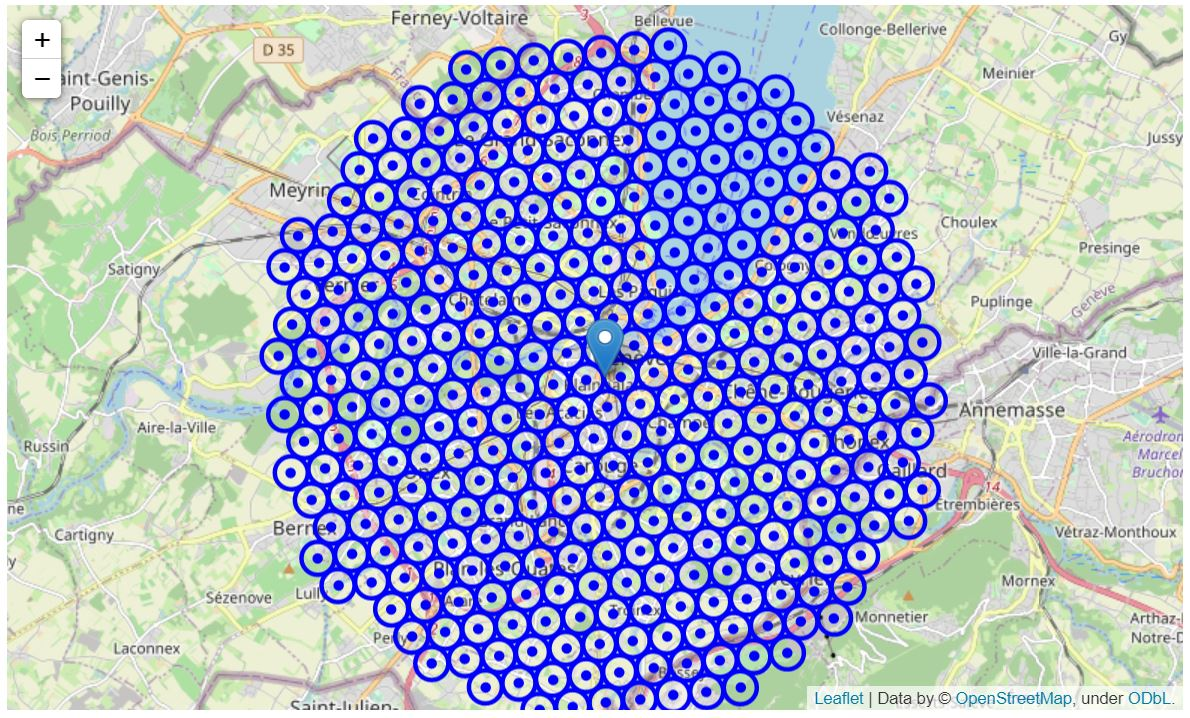

### 2.4 Integration of Foursquare and TPG data

Then, for each neighborood, we have queried Foursquare to get the cafés and bookshops addresses and the TPG data for the bus stops ones.

It has allowed us to populate the neighborood dataframe and then to depict the result.

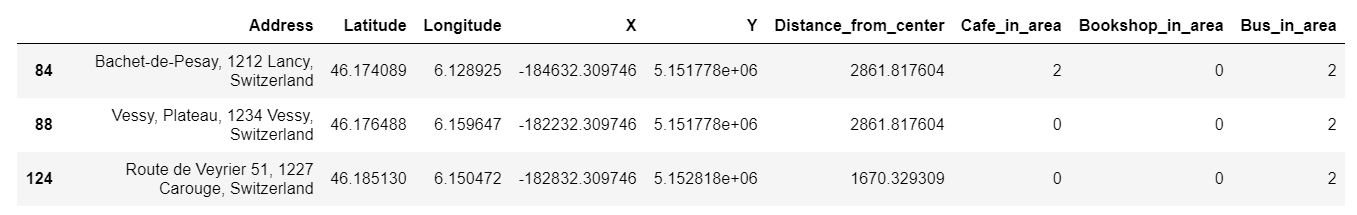

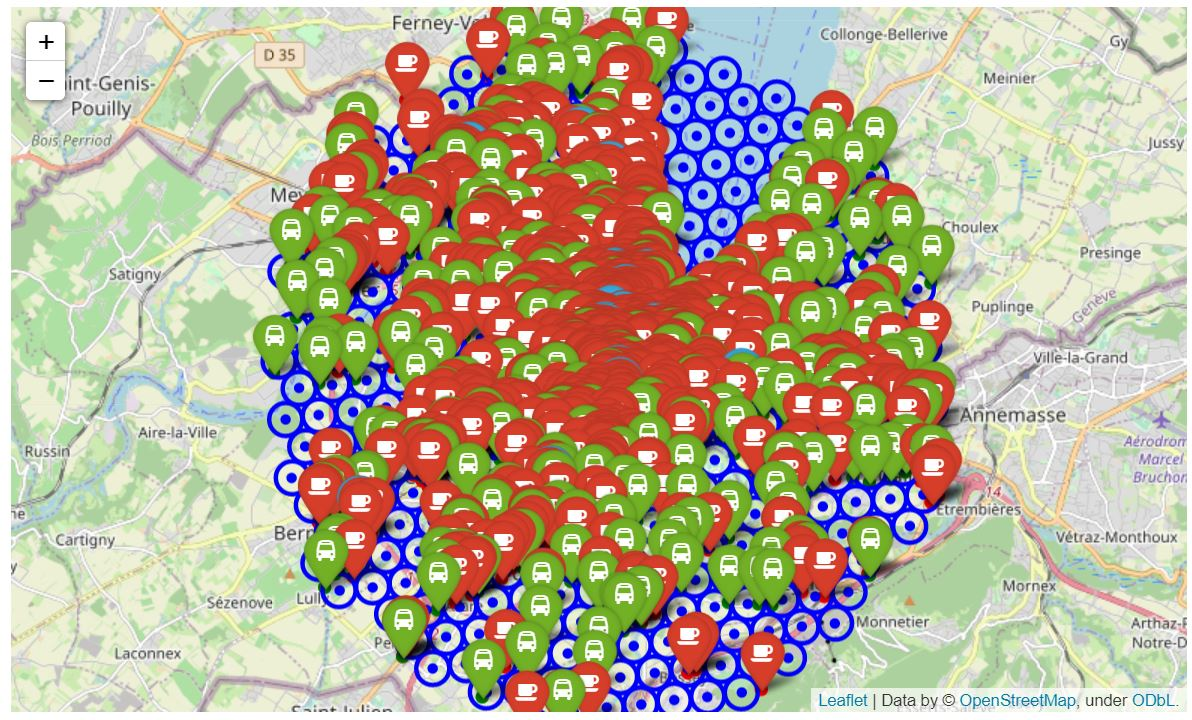



A neighborood in detail :

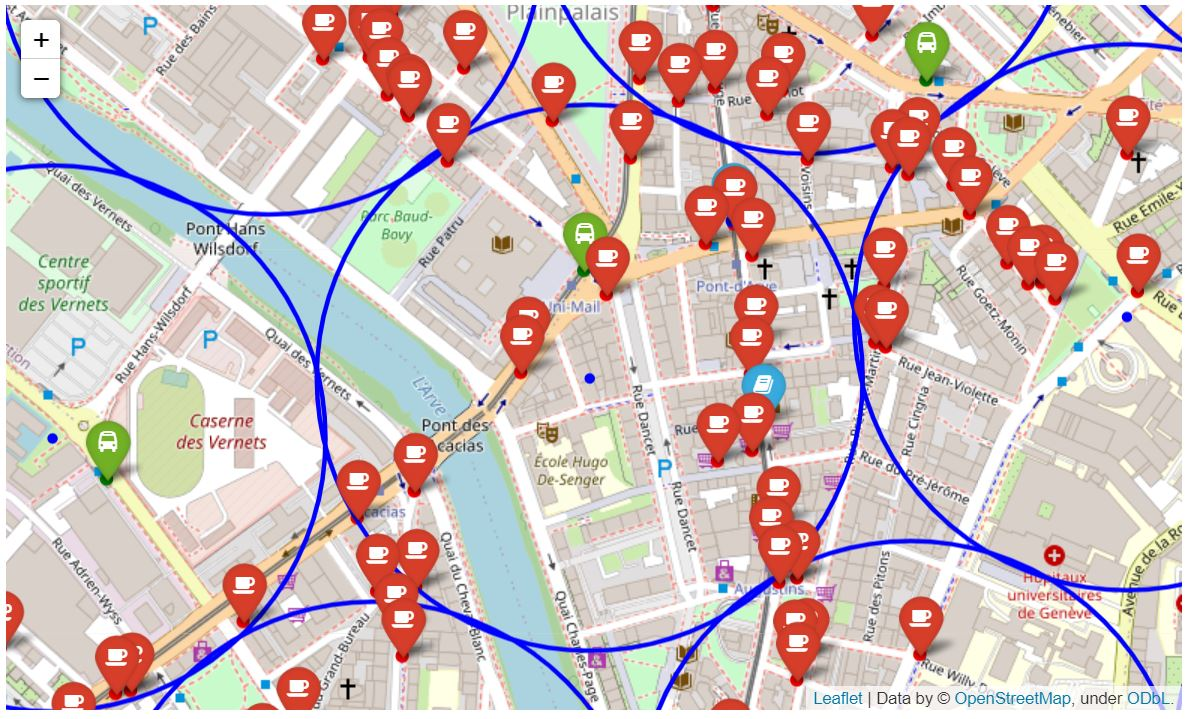

### 2.6 Recapitulation of neighboroods data

The integration of the Foursquare and TPG data resulted in the following figures :

|| Total number | Average in neighborood |
| ------------- | ------------- |------------- |
| Cafés (Foursquare) | 940  | 2.241  |
| Bookshops (Foursquare)  | 17  | 0.038  |
| Bus stops (TPG)  | 226  | 1.3626  |



### 2.7 Calculation of best neighboroods

In order to identify the best neighboroods for a new café-bookshop to open, we have applied the four criterias:

* maximum of 2 cafés in a radius of 300m.
* maximum of 1 bookshops in a radius of 300m. 
* minimum of 1 bus stop in a radius of 100m.           
* maximum distance to the city center of 3000m

This data filtering has narrowed down our neighborood data from 364 to 33 as depicted below in blue markers:

* Locations with a maximum of 2 cafés within 300m: **276**
* Locations with a maximum of 1 bookshop within 300m: **361**
* Locations with a minimum of 1 a bus stop within 100m: **248**
* Locations with a distance of max. 3000m from the city center: **92**
* Locations with all 4 conditions met: **33**


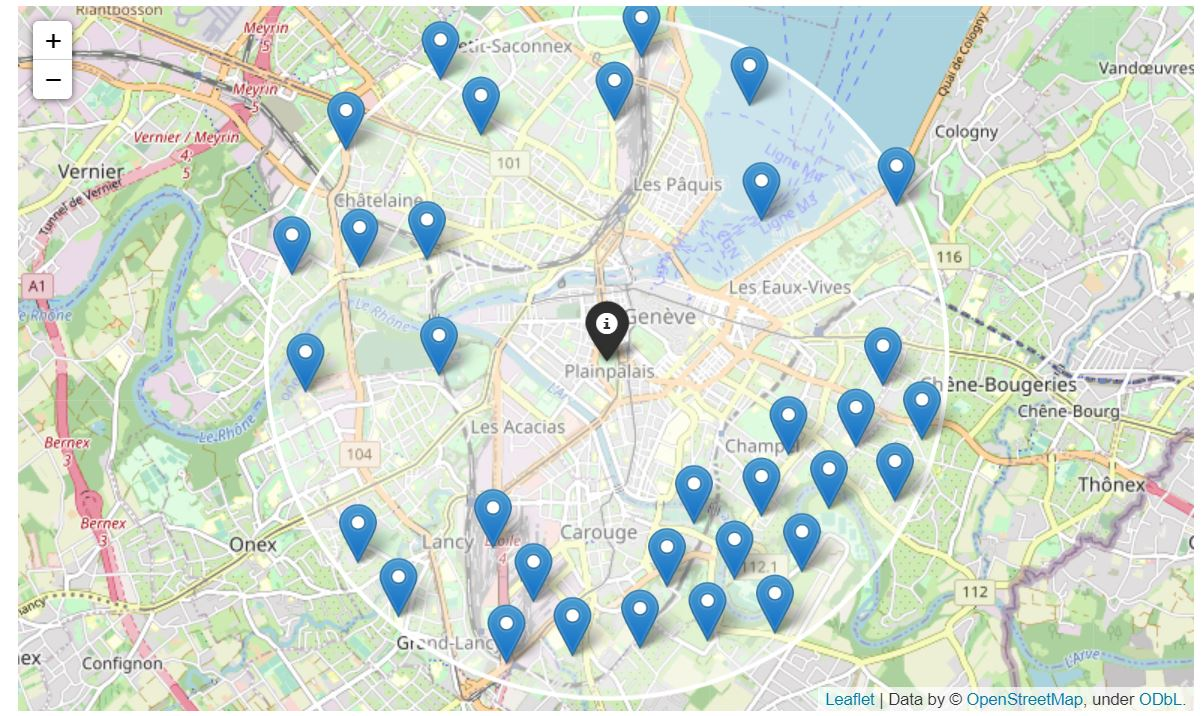

### 2.8 Calculation of clusters of neighboroods

From the 33 good locations, clusters have been calculated with the KMeans algorithm. After several trials of number of clusters, the number of 6 appeared to be relevant. They are depicted below each one with a different color.

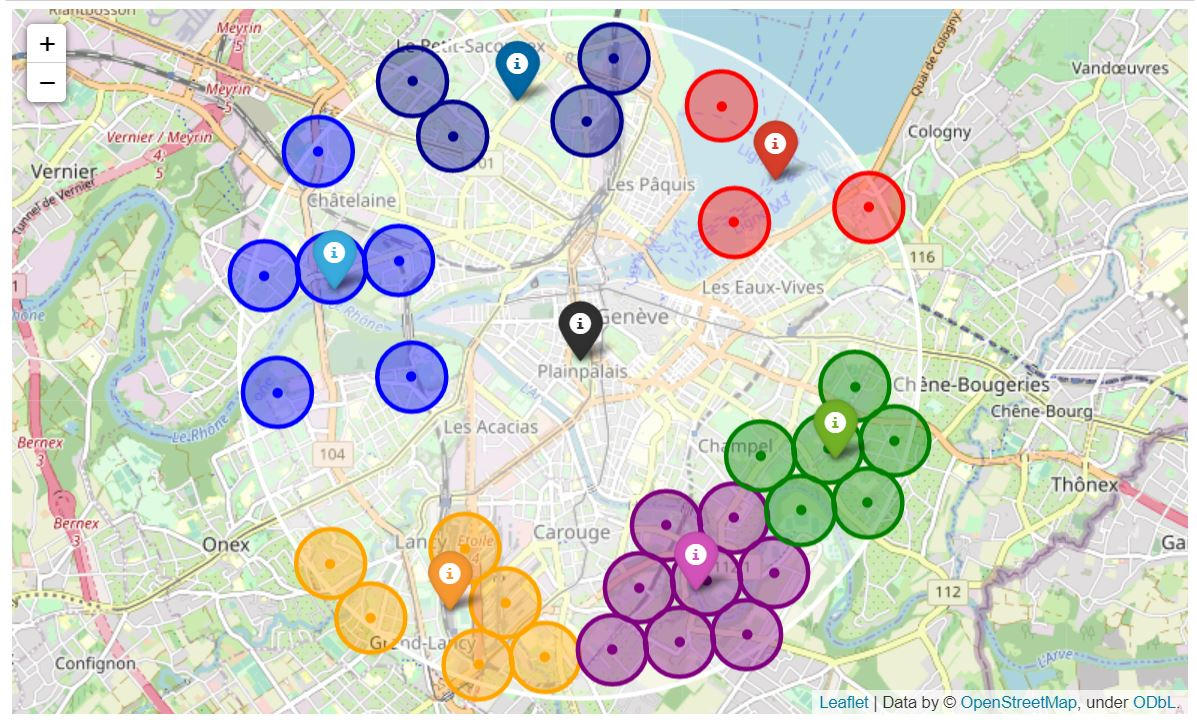

## 3. Analysis and Discussion <a name="result"></a>

<br>

Although with a good density of cafés, the City of Geneva has few bookshops. The highest concentration of cafés and bookshops appears to be around the city center. The depiction of these Foursquare venues, confirms our choice of city center with the location "Plainpalais" as a good one.

Among the clusters, one of them sould be ignored in the North-East (the red one), as it manly lies on the Leman lake and in gardens (Parc des Eaux-Vives, Parc de la Grange). 

Out of the 92 neighboroods within a distance of 3000m to the city center, about a third has resulted as best neighboroods.


## 4. Conclusion and further directions<a name="conclusion"></a>

<br>

Our goal was to explore the opportunities for an investor to open a coffee/bookshop in the city of Geneva (Switzerland) as this kind of place doesn't exist in the city yet. 

We have chosen to rely on the data of Google maps, Foursquare and TPG to identify the best locations. As Foursquare has shown lacks of data for the bus stops, we could, in a future test, query another data source in order to challenge it to assess whether Foursquare should remain the data source for the café and bookshops venues.

As further directions, we could :

* remove localisations on the Leman lake and gardens
* integrate the neighborhood mean incomes
* try another clustering method 

## 5. References <a name="references"></a>

Python libraries which have been used:
* DivIcon
* Folium
* Geos
* KMeans
* Line_profiler
* Math
* Numpy
* Os
* Pandas
* Pickle
* Request
* Shapely
* Transformer
* Types
* Warnings


Python pieces of code which we have adapted or have been inspired from:

* Grid creation and Foursquare data integration
(https://cocl.us/coursera_capstone_notebook)

* Conversion from the Swiss Geodesic system (CH1903) to the World Geodesic System (WGS84)
(https://github.com/ValentinMinder/Swisstopo-WGS84-LV03/blob/master/scripts/py/wgs84_ch1903.py)

